In [1]:
import pandas as pd  
import numpy as np   
# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

**Did some cleaning in excel before uploading**

In [3]:
file_path = r"C:\Users\nagai\OneDrive\Desktop\cleaneddata\cleaned_data1.csv" 
df = pd.read_csv(file_path, encoding='ISO-8859-1' , low_memory=False)
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351724 entries, 0 to 351723
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PO ID                           351724 non-null  object 
 1   PO line item num                351724 non-null  int64  
 2   PO line Release num             351724 non-null  int64  
 3   Supplier number                 351724 non-null  int64  
 4   Supplier name                   351724 non-null  object 
 5   ship-from address               351724 non-null  object 
 6   PN/line desc                    231010 non-null  object 
 7   Part Description                351724 non-null  object 
 8   line origination date           351724 non-null  object 
 9   Qty                             351724 non-null  float64
 10  Unit of Measure (UOM)           351724 non-null  object 
 11  Currency                        351724 non-null  object 
 12  Un

In [4]:
df.info

<bound method DataFrame.info of               PO ID  PO line item num  PO line Release num  Supplier number  \
0           *100009                 1                    1          3003479   
1           *100011                 1                    1          1000741   
2           *100011                 1                    1          1000741   
3           *100011                 1                    2          1000741   
4           *100011                 1                    2          1000741   
...             ...               ...                  ...              ...   
351719  VMIPROD2023                 1                    1          3002369   
351720  VMIPROD2023                 1                    1          3002369   
351721  VMIPROD2023                 2                    1          3002369   
351722  VMIPROD2023                 2                    1          3002369   
351723            Z                 1                    1          1000292   

               Supp

In [6]:
df.head(10)

,PO ID,PO line item num,PO line Release num,Supplier number,Supplier name,ship-from address,PN/line desc,Part Description,line origination date,Qty,...,Currency,Unit cost,Extended cost,Request date / Need date,Supplier acknowledgment date,Supplier promise date,Delivery date/receipt date,Line item status (open/closed),Buyer name,Ship to address_y
0,*100009,1,1,3003479,Cellares,"341 Allenton Ave South San Francisco, CA 9408...",540-00023-0CS,"ETHERCAT PLUG-IN MOD, 8-CH OUT, ANALOG, 24 VDC...",5/9/2024,8.0,...,USD,0.00,0.00,5/9/2024,5/9/2024,5/9/2024,5/9/2024,Closed,Rner,103
1,*100011,1,1,1000741,Korvis Automation,"2101 NE Jack London Street Corvallis, OR 9733...",455-03526-0,"CLAMP, PICOMAG SENSOR, SIDE MOUNTED",12/9/2024,16.0,...,USD,25.55,408.80,1/6/2025,1/6/2025,1/6/2025,1/9/2025,Cancelled,Jeda,103
2,*100011,1,1,1000741,Korvis Automation,"4100 SW RESEARCH WAY CORVALLIS, OR 97333 UNIT...",455-03526-0,"CLAMP, PICOMAG SENSOR, SIDE MOUNTED",12/9/2024,16.0,...,USD,25.55,408.80,1/6/2025,1/6/2025,1/6/2025,1/9/2025,Cancelled,Jeda,103
3,*100011,1,2,1000741,Korvis Automation,"2101 NE Jack London Street Corvallis, OR 9733...",455-03526-0,"CLAMP, PICOMAG SENSOR, SIDE MOUNTED",12/9/2024,16.0,...,USD,25.55,408.80,2/11/2025,2/11/2025,2/11/2025,2/14/2025,Cancelled,Jeda,103
4,*100011,1,2,1000741,Korvis Automation,"4100 SW RESEARCH WAY CORVALLIS, OR 97333 UNIT...",455-03526-0,"CLAMP, PICOMAG SENSOR, SIDE MOUNTED",12/9/2024,16.0,...,USD,25.55,408.80,2/11/2025,2/11/2025,2/11/2025,2/14/2025,Cancelled,Jeda,103
5,*100011,2,1,1000741,Korvis Automation,"2101 NE Jack London Street Corvallis, OR 9733...",455-02936-0,"DOOR FRAME, RVS JIT, LOWER",12/9/2024,1.0,...,USD,1157.45,1157.45,12/3/2024,12/3/2024,12/3/2024,12/6/2024,Cancelled,Jeda,103
6,*100011,2,1,1000741,Korvis Automation,"4100 SW RESEARCH WAY CORVALLIS, OR 97333 UNIT...",455-02936-0,"DOOR FRAME, RVS JIT, LOWER",12/9/2024,1.0,...,USD,1157.45,1157.45,12/3/2024,12/3/2024,12/3/2024,12/6/2024,Cancelled,Jeda,103
7,*100011,2,2,1000741,Korvis Automation,"2101 NE Jack London Street Corvallis, OR 9733...",455-02936-0,"DOOR FRAME, RVS JIT, LOWER",12/9/2024,1.0,...,USD,1157.45,1157.45,2/11/2025,2/11/2025,2/11/2025,2/14/2025,Cancelled,Jeda,103
8,*100011,2,2,1000741,Korvis Automation,"4100 SW RESEARCH WAY CORVALLIS, OR 97333 UNIT...",455-02936-0,"DOOR FRAME, RVS JIT, LOWER",12/9/2024,1.0,...,USD,1157.45,1157.45,2/11/2025,2/11/2025,2/11/2025,2/14/2025,Cancelled,Jeda,103
9,00686-01RWK,1,1,1003396,Henry Machine Inc,"2316 La Mirada Drive Vista, CA 92081 UNITED S...",00686-01,"FOOT, BIOXP 9600",5/2/2022,125.0,...,USD,7.50,937.50,5/17/2022,5/17/2022,5/17/2022,5/17/2022,Closed,Tano,101


In [7]:
df_cleaned = df.drop_duplicates(subset=['PO ID', 'PO line item num', 'PO line Release num', 'Supplier number'], keep='last')

In [8]:
df['Supplier promise date'] = df['Supplier promise date'].ffill()

# Removing duplicates (if any)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

df_cleaned.reset_index(drop=True, inplace=True)

In [9]:
# Convert date columns to datetime
df['line origination date'] = pd.to_datetime(df['line origination date'], errors='coerce')
df['Delivery date/receipt date'] = pd.to_datetime(df['Delivery date/receipt date'], errors='coerce')
df['Supplier promise date'] = pd.to_datetime(df['Supplier promise date'], errors='coerce')
df['Request date / Need date'] = pd.to_datetime(df['Request date / Need date'], errors='coerce')
df['Supplier acknowledgment date'] = pd.to_datetime(df['Supplier acknowledgment date'], errors='coerce')

In [10]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_summary)

                                Missing Values  Percentage
PO ID                                        0    0.000000
PO line item num                             0    0.000000
PO line Release num                          0    0.000000
Supplier number                              0    0.000000
Supplier name                                0    0.000000
ship-from address                            0    0.000000
PN/line desc                            120707   34.325307
Part Description                             0    0.000000
line origination date                        0    0.000000
Qty                                          0    0.000000
Unit of Measure (UOM)                        0    0.000000
Currency                                     0    0.000000
Unit cost                                    0    0.000000
Extended cost                                0    0.000000
Request date / Need date                     3    0.000853
Supplier acknowledgment date                 4    0.0011

In [28]:
df['PN/line desc'].fillna('N/A', inplace=True)

## Checking Missing values and thier percentage

In [30]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_summary)

                                Missing Values  Percentage
PO ID                                        0        0.00
PO line item num                             0        0.00
PO line Release num                          0        0.00
Supplier number                              0        0.00
Supplier name                                0        0.00
ship-from address                            0        0.00
PN/line desc                                 0        0.00
Part Description                             0        0.00
line origination date                        0        0.00
Qty                                          0        0.00
Unit of Measure (UOM)                        0        0.00
Currency                                     0        0.00
Unit cost                                    0        0.00
Extended cost                                0        0.00
Request date / Need date                     3        0.00
Supplier acknowledgment date                 4        0.

## Value Analysis

In [12]:
pd.options.display.float_format = '{:,.2f}'.format
print(df[['Qty', 'Unit cost', 'Extended cost']].describe())

               Qty  Unit cost  Extended cost
count   351,656.00 351,656.00     351,656.00
mean        358.82     233.47       2,604.23
std       8,794.66   3,707.77      56,445.32
min           0.01       0.00           0.00
25%           2.00       3.60          37.40
50%          10.00      16.12         201.50
75%          58.00      66.49         958.50
max   1,743,685.00 733,743.00  14,407,450.00


## Buyer's Spending

In [26]:
buyer_spending = df.groupby('Buyer name')['Extended cost'].sum().sort_values(ascending=False)
print(buyer_spending)

Buyer name
Inez   216,519,465.78
Llee    88,780,557.86
Llen    75,429,997.01
Kian    51,346,333.76
Uyen    49,958,851.77
Rner    47,454,733.08
Tano    41,615,662.65
Hunt    39,590,972.13
Sler    39,436,448.94
Rlim    32,446,555.69
Moon    24,539,438.14
Y_To    23,128,542.66
Ield    19,759,465.79
Hica    18,719,591.95
Phan    17,426,379.39
.Lim    16,311,204.65
Icer    16,186,818.50
Wser    15,516,152.37
Nson    13,968,364.78
Rper    11,658,154.90
Eman     9,136,189.04
Rson     7,813,210.18
Rero     6,158,235.83
Chen     5,661,613.50
Jeda     4,873,835.94
Illo     3,390,383.24
Opez     3,294,510.54
Skee     2,427,020.27
.Loh     2,394,311.06
.Goh     2,175,512.23
Tana     2,146,739.06
.Tan     1,707,679.40
Tega     1,232,515.54
Tman       890,081.03
Coll       736,579.21
Cloh       635,231.98
Bell       581,612.03
Yoon       350,891.71
*          101,846.66
Udin        82,485.06
Bons        66,364.18
Ctoh        43,428.00
Ster        36,025.64
Edro        29,383.36
.Koo        18,741.35

## TOP SUPPLIERS BY QUANTITY

In [28]:
top_suppliers = df['Supplier name'].value_counts().head(20)
print(top_suppliers)

Supplier name
Mcmaster-Carr Supply                                                  45241
Digi Key                                                              25960
Korvis Automation                                                     14762
Hl Precision Manufacturing, Llc                                        9170
Uline                                                                  8644
Amazon.Com                                                             8121
International Manufacturing & Assembly                                 7972
Sunpe Limited Inc.                                                     7504
Mouser Electronics Inc                                                 5968
Concise Llc                                                            4870
Msc Industrial Supply Co.                                              4722
Hayes Bolt & Supply                                                    4158
Quicksilver-Mfg **Do Not Use**                                         411

In [387]:
# Basic summary statistics
summary_stats = df.describe()

# Frequency count for categorical columns
category_counts = df['Supplier name'].value_counts()


# COST

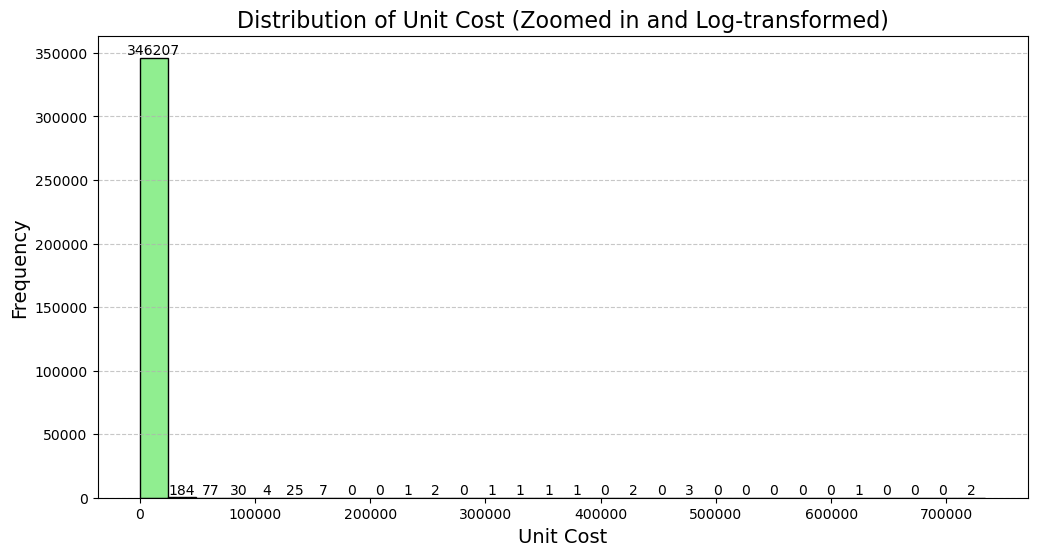

In [467]:
import matplotlib.pyplot as plt

# Filter data to avoid log(0) errors and focus on positive values
filtered_data = df['Unit cost'][df['Unit cost'] > 0]


plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(filtered_data, bins=30, color='lightgreen', edgecolor='black')


for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count + 1, int(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Unit Cost (Zoomed in and Log-transformed)', fontsize=16)
plt.xlabel('Unit Cost', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.show()


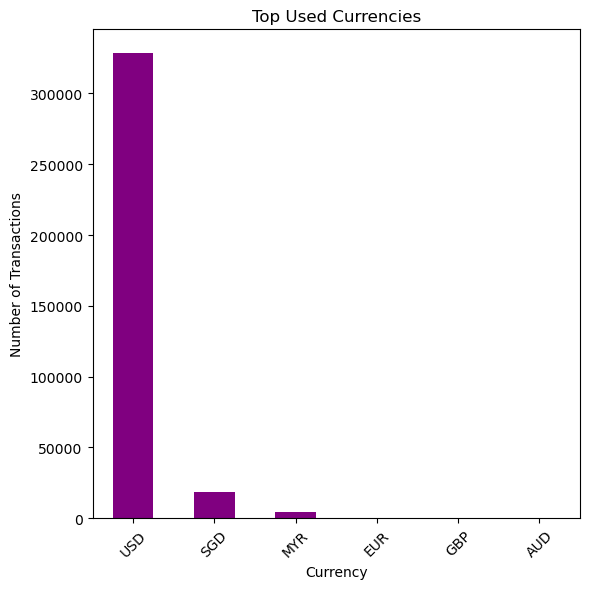

In [30]:
# 7. Most Used Currency
top_currencies = df['Currency'].value_counts().head(10)
plt.figure(figsize=(6, 6))
top_currencies.plot(kind='bar', color='purple')
plt.title('Top Used Currencies')
plt.xlabel('Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


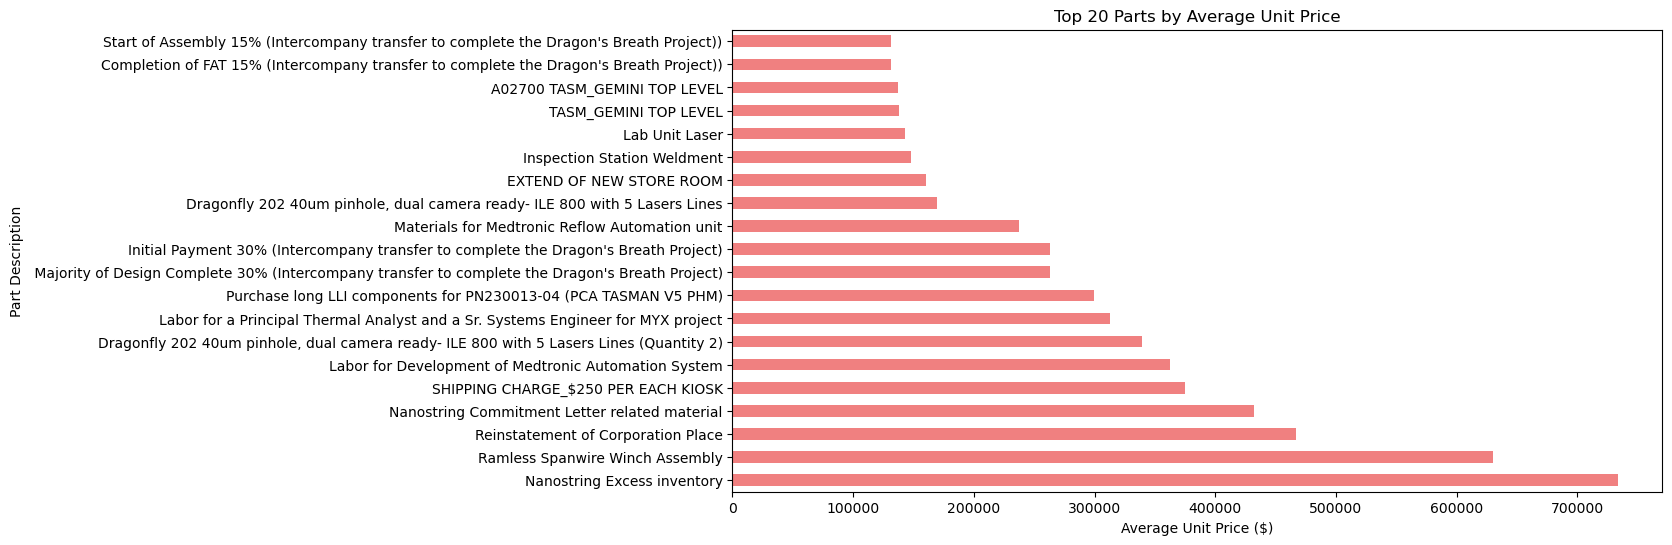

Part Description
Nanostring Excess inventory                                                                        733,743.00
Ramless Spanwire Winch Assembly                                                                    629,801.00
Reinstatement of Corporation Place                                                                 467,300.00
Nanostring Commitment Letter related material                                                      431,895.00
SHIPPING CHARGE_$250 PER EACH KIOSK                                                                375,000.00
Labor for Development of Medtronic Automation System                                               362,354.00
Dragonfly 202 40um pinhole, dual camera ready- ILE 800 with 5 Lasers Lines (Quantity 2)            339,197.00
Labor for a Principal Thermal Analyst and a Sr. Systems Engineer for MYX project                   312,685.00
Purchase long LLI components for PN230013-04 (PCA TASMAN V5 PHM)                                   299,

In [31]:
# Get the top 20 parts with the highest unit price
top_20_parts_by_unit_price = df.groupby('Part Description')['Unit cost'].mean().nlargest(20)


plt.figure(figsize=(12, 6))
top_20_parts_by_unit_price.plot(kind='barh', color='lightcoral')
plt.title('Top 20 Parts by Average Unit Price')
plt.xlabel('Average Unit Price ($)')
plt.ylabel('Part Description')
plt.show()

# Display the top 20 parts and their unit prices
top_20_parts_by_unit_price


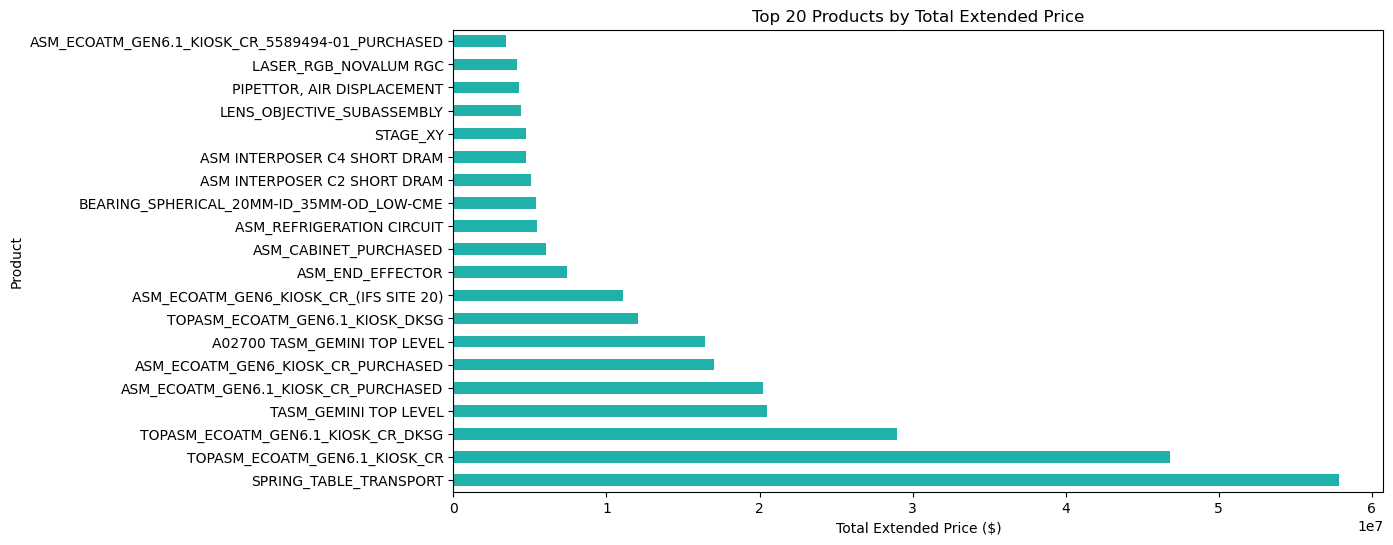

Part Description
SPRING_TABLE_TRANSPORT                            57,864,818.54
TOPASM_ECOATM_GEN6.1_KIOSK_CR                     46,800,420.00
TOPASM_ECOATM_GEN6.1_KIOSK_CR_DKSG                28,985,750.00
TASM_GEMINI TOP LEVEL                             20,482,994.70
ASM_ECOATM_GEN6.1_KIOSK_CR_PURCHASED              20,206,599.00
ASM_ECOATM_GEN6_KIOSK_CR_PURCHASED                17,019,918.00
A02700 TASM_GEMINI TOP LEVEL                      16,421,250.00
TOPASM_ECOATM_GEN6.1_KIOSK_DKSG                   12,067,870.00
ASM_ECOATM_GEN6_KIOSK_CR_(IFS SITE 20)            11,081,400.00
ASM_END_EFFECTOR                                   7,394,924.00
ASM_CABINET_PURCHASED                              6,021,500.00
ASM_REFRIGERATION CIRCUIT                          5,440,472.29
BEARING_SPHERICAL_20MM-ID_35MM-OD_LOW-CME          5,374,612.96
ASM INTERPOSER C2 SHORT DRAM                       5,051,879.70
ASM INTERPOSER C4 SHORT DRAM                       4,746,168.00
STAGE_XY               

In [32]:
# total extended price for each part
product_extended_price = df.groupby('Part Description')['Extended cost'].sum()

# top 20 products with the highest total extended price
top_20_products_by_extended_price = product_extended_price.nlargest(20)


plt.figure(figsize=(12, 6))
top_20_products_by_extended_price.plot(kind='barh', color='lightseagreen')
plt.title('Top 20 Products by Total Extended Price')
plt.xlabel('Total Extended Price ($)')
plt.ylabel('Product')
plt.show()

# top 20 products and their extended prices
top_20_products_by_extended_price


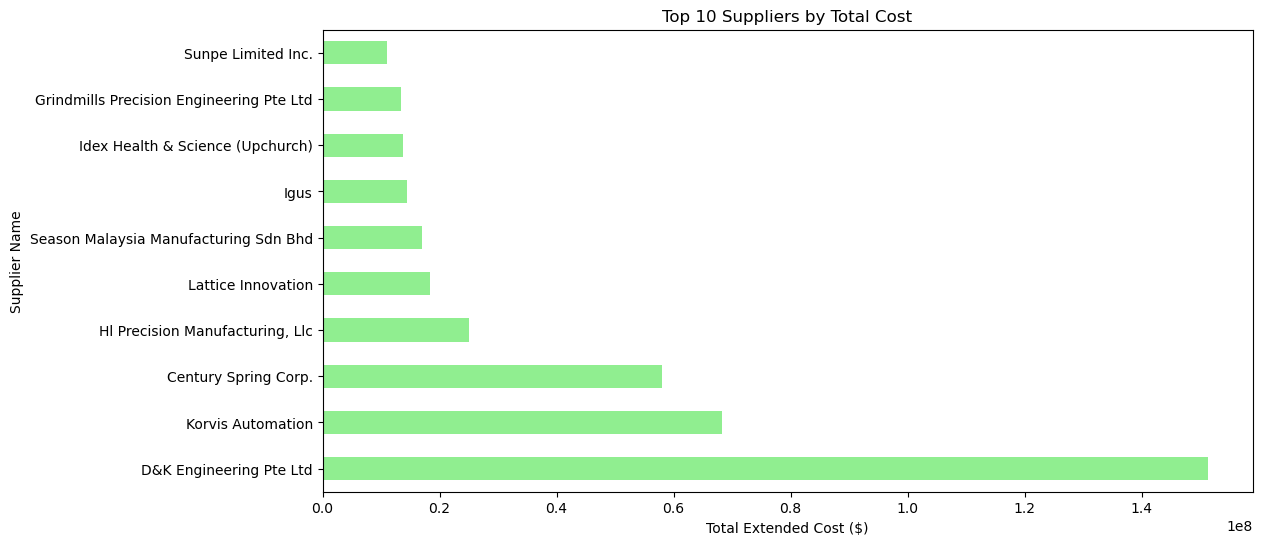

Supplier name
D&K Engineering Pte Ltd                    151,363,869.80
Korvis Automation                           68,213,377.50
Century Spring Corp.                        58,014,452.50
Hl Precision Manufacturing, Llc             24,954,534.04
Lattice Innovation                          18,386,895.42
Season Malaysia Manufacturing Sdn Bhd       16,940,494.14
Igus                                        14,452,069.54
Idex Health & Science (Upchurch)            13,698,524.00
Grindmills Precision Engineering Pte Ltd    13,438,960.88
Sunpe Limited Inc.                          11,021,821.42
Name: Extended cost, dtype: float64

In [33]:
# Total cost by supplier
df['Extended cost'] = pd.to_numeric(df['Extended cost'], errors='coerce')
supplier_cost = df.groupby('Supplier name')['Extended cost'].sum()

# top 10 suppliers by total cost
top_10_suppliers = supplier_cost.nlargest(10)


plt.figure(figsize=(12, 6))
top_10_suppliers.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Suppliers by Total Cost')
plt.xlabel('Total Extended Cost ($)')
plt.ylabel('Supplier Name')
plt.show()

# Display the top 10 suppliers
top_10_suppliers


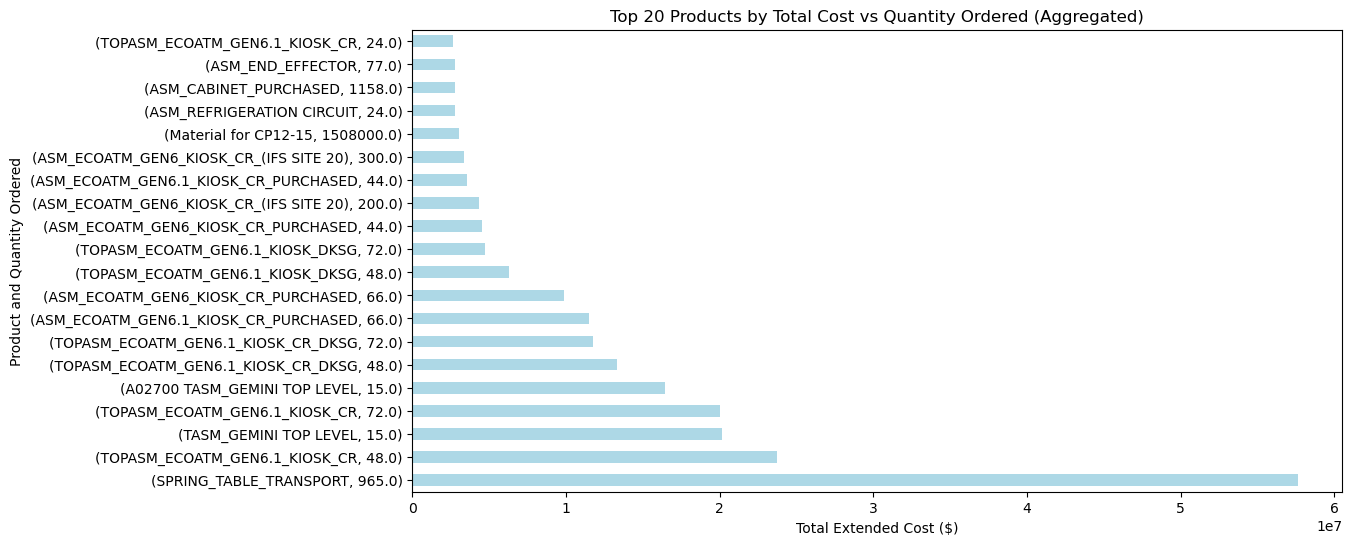

In [34]:
# Aggregate data by product and quantity ordered, and calculate the sum of extended costs
product_quantity_cost = df.groupby(['Part Description','Qty'])['Extended cost'].sum()

# top 20 combinations of product and quantity with the highest total extended cost
top_20_product_quantity_cost = product_quantity_cost.nlargest(20)


plt.figure(figsize=(12, 6))
top_20_product_quantity_cost.plot(kind='barh', color='lightblue')
plt.title('Top 20 Products by Total Cost vs Quantity Ordered (Aggregated)')
plt.xlabel('Total Extended Cost ($)')
plt.ylabel('Product and Quantity Ordered')
plt.show()

# ORDER

In [419]:
file_path = r"C:\Users\nagai\OneDrive\Desktop\cleaneddata\cleaned_data1.csv" 
df = pd.read_csv(file_path, encoding='ISO-8859-1' , low_memory=False)

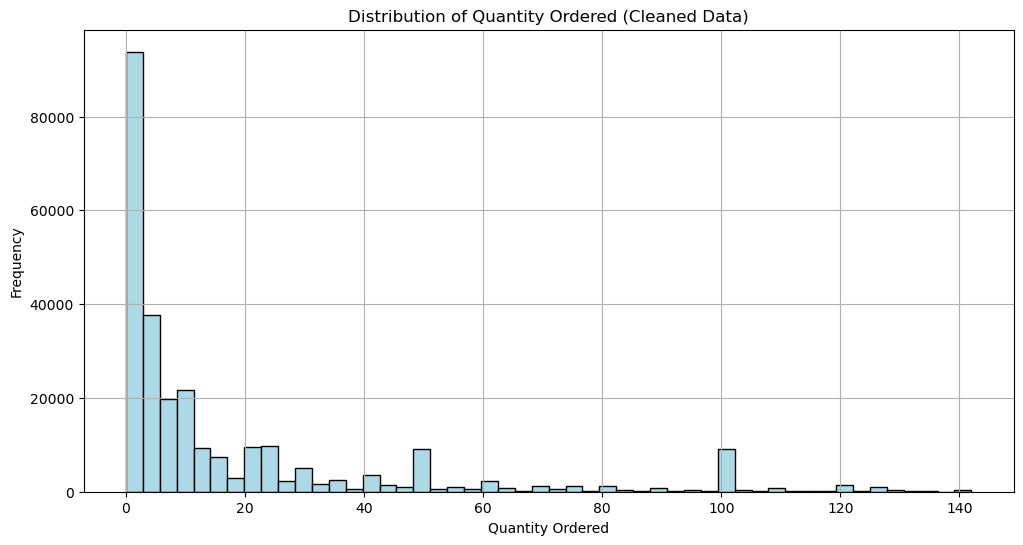

In [457]:
plt.figure(figsize=(12, 6))
df_cleaned['Qty'].hist(bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Quantity Ordered (Cleaned Data)')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

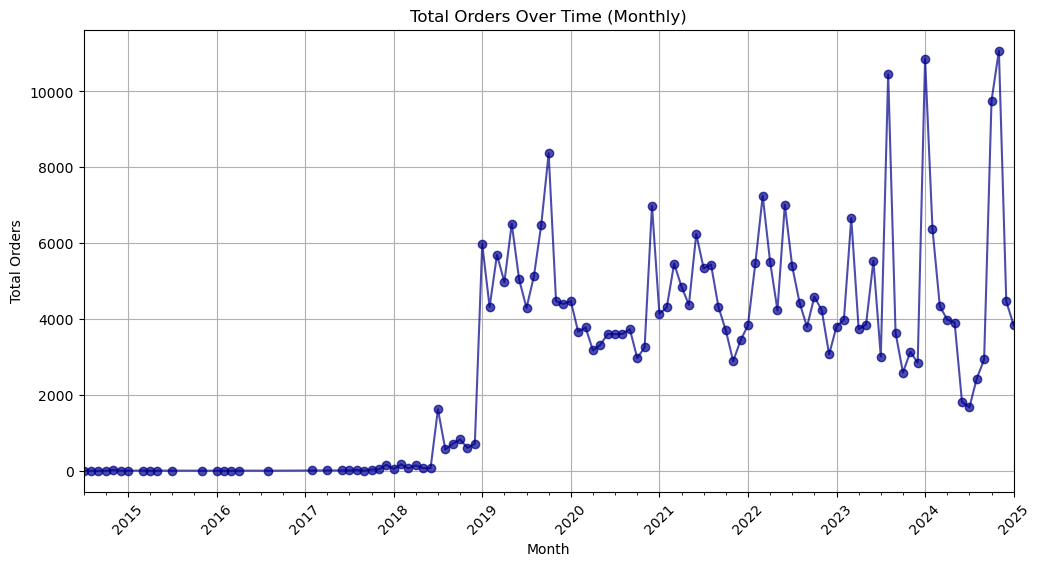

In [37]:
# Convert 'line origination date' to datetime
df['line origination date'] = pd.to_datetime(df['line origination date'], errors='coerce')

# Aggregate total orders by month
monthly_orders = df.groupby(df['line origination date'].dt.to_period('M')).size()


plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', color='darkblue', marker='o', linestyle='-', alpha=0.7)
plt.title('Total Orders Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


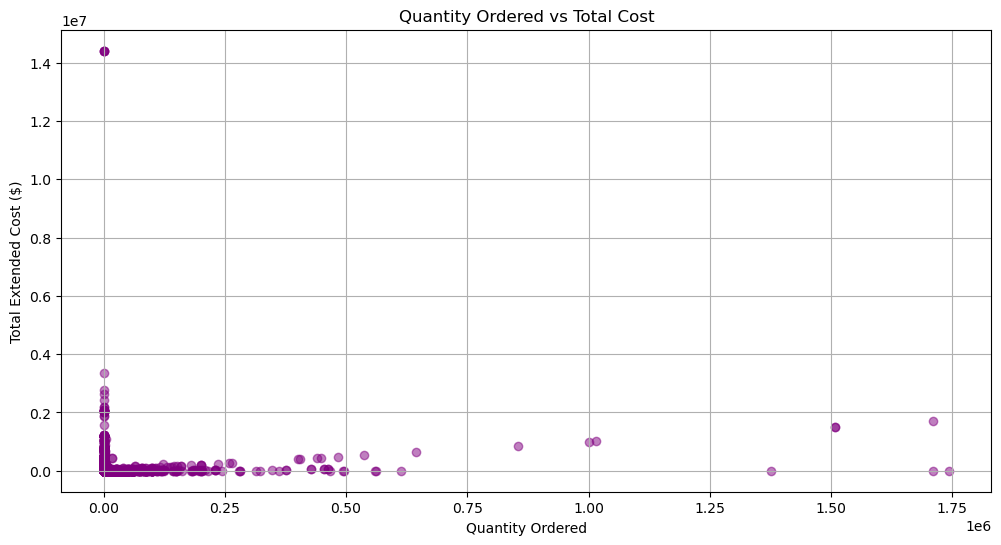

In [39]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Qty'], df['Extended cost'], alpha=0.5, color='purple')
plt.title('Quantity Ordered vs Total Cost')
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Extended Cost ($)')
plt.grid(True)
plt.show()


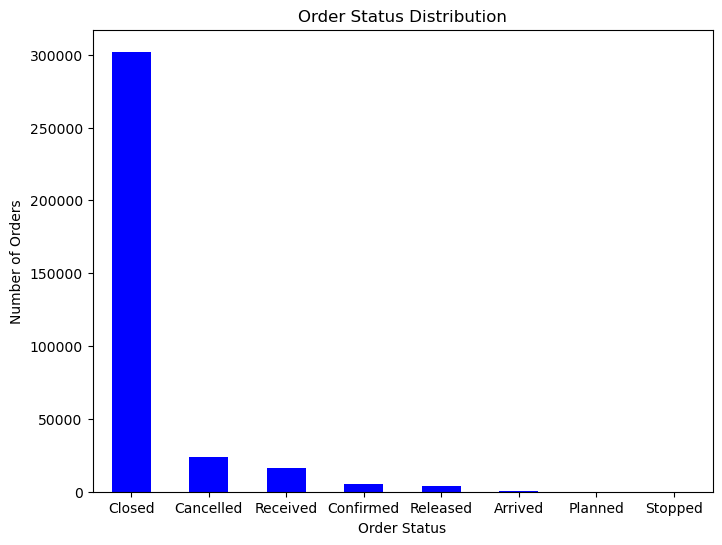

Line item status (open/closed)
Closed       302048
Cancelled     24047
Received      16111
Confirmed      5223
Released       3610
Arrived         594
Planned          87
Stopped           4
Name: count, dtype: int64

In [40]:
# Order status distribution
order_status = df['Line item status (open/closed)'].value_counts()


plt.figure(figsize=(8, 6))
order_status.plot(kind='bar', color='blue')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

# Display order status counts
order_status


## Average order cycle time

In [42]:
# order cycle time (in days)
df['Order Cycle Time (days)'] = (pd.to_datetime(df['Delivery date/receipt date']) - 
                                 pd.to_datetime(df['Request date / Need date'])).dt.days

# average order cycle time
average_cycle_time = df['Order Cycle Time (days)'].mean()

# average order cycle time
print(f"Average Order Cycle Time: {average_cycle_time:.2f} days")


Average Order Cycle Time: 8.83 days


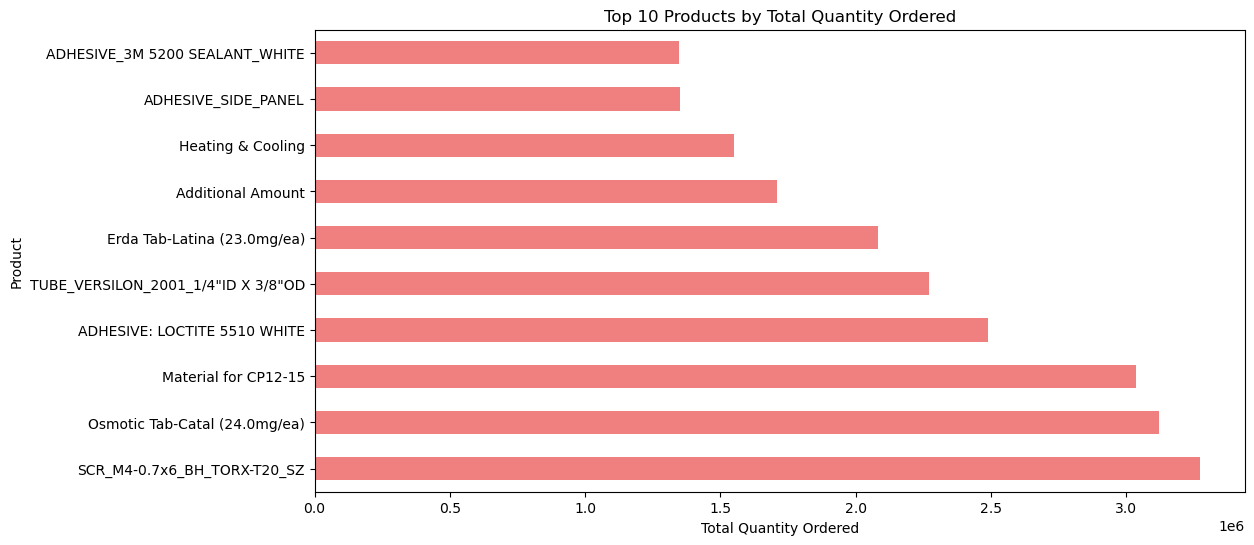

Part Description
SCR_M4-0.7x6_BH_TORX-T20_SZ          3,273,709.00
Osmotic Tab-Catal (24.0mg/ea)        3,119,888.00
Material for CP12-15                 3,037,408.00
ADHESIVE: LOCTITE 5510 WHITE         2,487,510.00
TUBE_VERSILON_2001_1/4"ID X 3/8"OD   2,269,879.00
Erda Tab-Latina (23.0mg/ea)          2,081,415.00
Additional Amount                    1,710,736.00
Heating & Cooling                    1,551,273.00
ADHESIVE_SIDE_PANEL                  1,351,000.00
ADHESIVE_3M 5200 SEALANT_WHITE       1,345,351.83
Name: Qty, dtype: float64

In [43]:
# Total quantity ordered by product
product_quantity = df.groupby('Part Description')['Qty'].sum().nlargest(10)


plt.figure(figsize=(12, 6))
product_quantity.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Products by Total Quantity Ordered')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product')
plt.show()

# top 10 products and their quantities
product_quantity


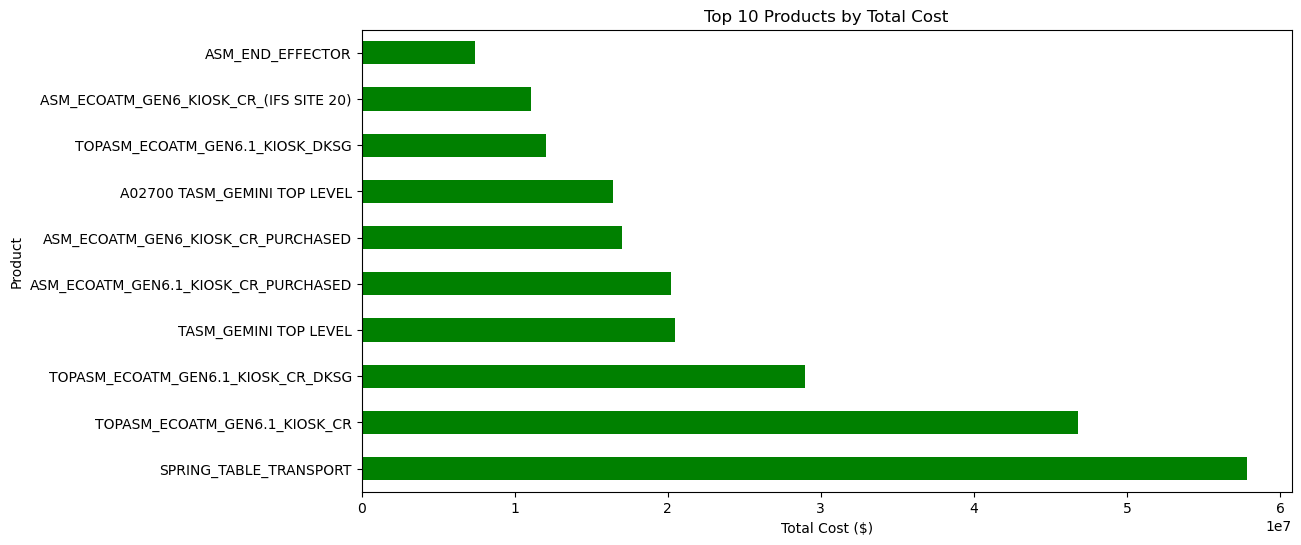

Part Description
SPRING_TABLE_TRANSPORT                   57,864,818.54
TOPASM_ECOATM_GEN6.1_KIOSK_CR            46,800,420.00
TOPASM_ECOATM_GEN6.1_KIOSK_CR_DKSG       28,985,750.00
TASM_GEMINI TOP LEVEL                    20,482,994.70
ASM_ECOATM_GEN6.1_KIOSK_CR_PURCHASED     20,206,599.00
ASM_ECOATM_GEN6_KIOSK_CR_PURCHASED       17,019,918.00
A02700 TASM_GEMINI TOP LEVEL             16,421,250.00
TOPASM_ECOATM_GEN6.1_KIOSK_DKSG          12,067,870.00
ASM_ECOATM_GEN6_KIOSK_CR_(IFS SITE 20)   11,081,400.00
ASM_END_EFFECTOR                          7,394,924.00
Name: Extended cost, dtype: float64

In [44]:
# total cost by product
df['Extended cost'] = pd.to_numeric(df['Extended cost'], errors='coerce')
product_cost = df.groupby('Part Description')['Extended cost'].sum().nlargest(10)


plt.figure(figsize=(12, 6))
product_cost.plot(kind='barh', color='green')
plt.title('Top 10 Products by Total Cost')
plt.xlabel('Total Cost ($)')
plt.ylabel('Product')
plt.show()

# Display the top 10 products and their total cost
product_cost


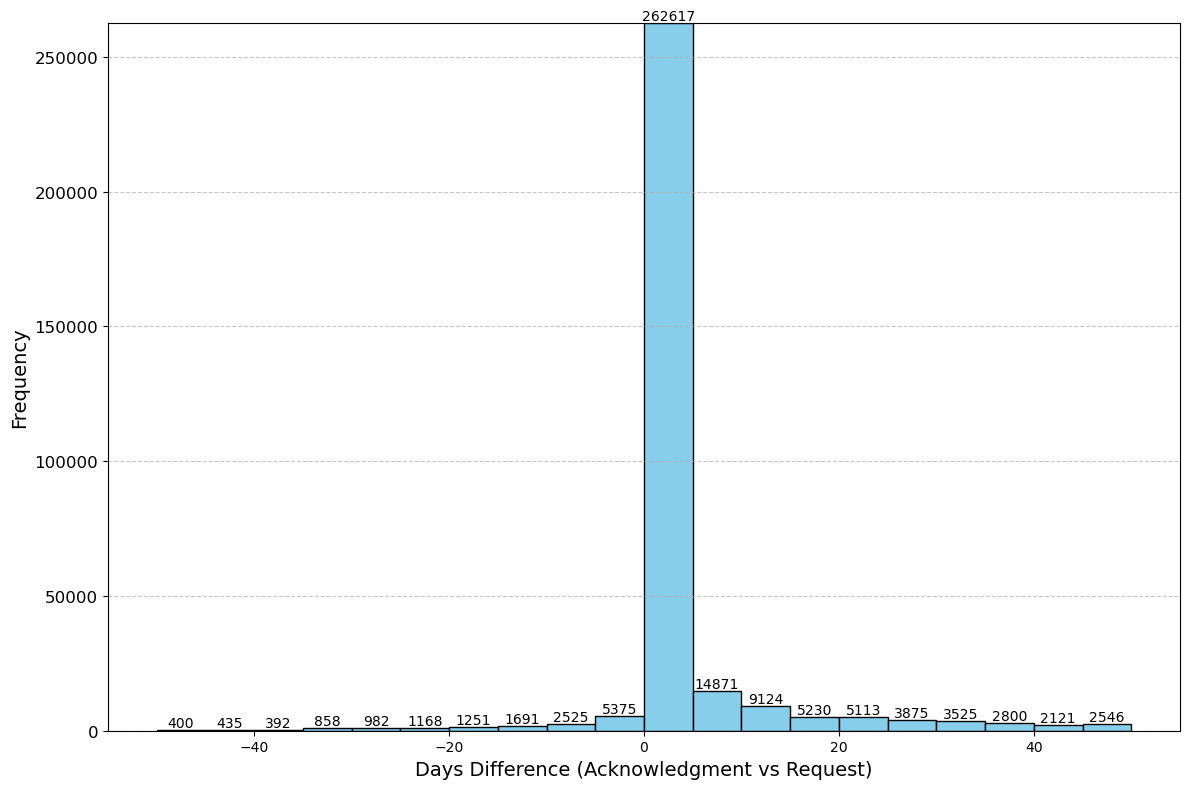

In [45]:
if df['Supplier acknowledgment date'].dtype == 'O' or df['Request date / Need date'].dtype == 'O':
    df['Supplier acknowledgment date'] = pd.to_datetime(df['Supplier acknowledgment date'], errors='coerce')
    df['Request date / Need date'] = pd.to_datetime(df['Request date / Need date'], errors='coerce')

df['Acknowledgment Delay (days)'] = (df['Supplier acknowledgment date'] - df['Request date / Need date']).dt.days
#extreme outliers 
filtered_ack_delays = df[(df['Acknowledgment Delay (days)'] >= -50) & (df['Acknowledgment Delay (days)'] <= 50)]

plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(filtered_ack_delays['Acknowledgment Delay (days)'].dropna(), bins=20, color='skyblue', edgecolor='black')
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count + 1, int(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Days Difference (Acknowledgment vs Request)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust frequency axis dynamically
max_freq = max(counts) + 10
plt.ylim(0, max_freq)


plt.tight_layout()
plt.show()


# DELIVERY

In [102]:
# Convert the date columns to datetime format
df['Supplier promise date'] = pd.to_datetime(df['Supplier promise date'], errors='coerce')
df['Delivery date/receipt date'] = pd.to_datetime(df['Delivery date/receipt date'], errors='coerce')

# calculateing the delivery delay
df['Delivery Delay (days)'] = (df['Delivery date/receipt date'] - df['Supplier promise date']).dt.days


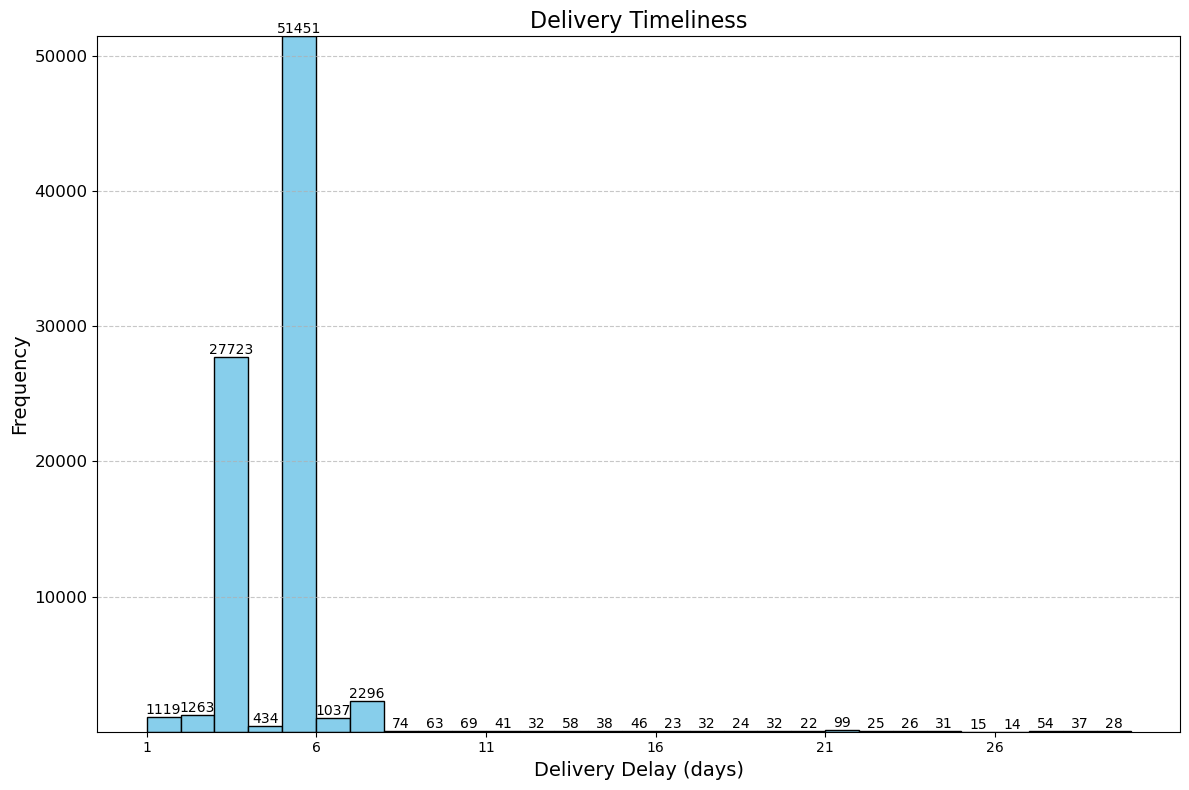

In [104]:
# 4. Delivery Timeliness
df['Delivery Delay (days)'] = (df['Delivery date/receipt date'] - df['Supplier promise date']).dt.days

# Zoom into delays within 0-30 days
zoomed_delays = df[(df['Delivery Delay (days)'] >= 0) & (df['Delivery Delay (days)'] <= 30)]

plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(zoomed_delays['Delivery Delay (days)'].dropna(), bins=range(1, 31, 1), color='skyblue', edgecolor='black')
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count + 1, int(count), ha='center', va='bottom', fontsize=10)
    
plt.title('Delivery Timeliness', fontsize=16)
plt.xlabel('Delivery Delay (days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(1, 31, 5), rotation=0)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# adjusting frequency axis dynamically
max_freq = max(counts) + 10
plt.ylim(1, max_freq)

plt.tight_layout()
plt.show()

# Supplier with Most Delays vs Number of supplies

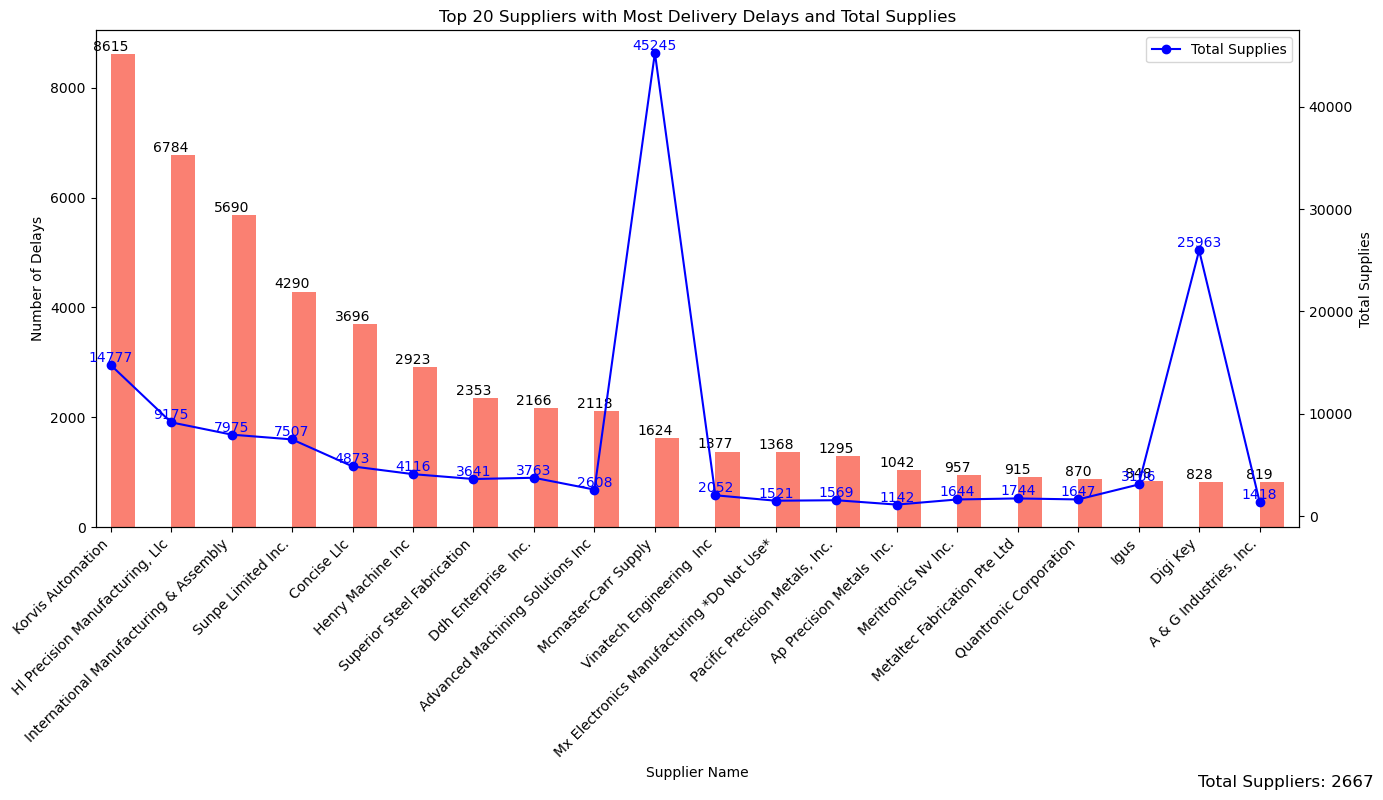

In [106]:
supplier_delays = df[df['Delivery Delay (days)'] > 0].groupby('Supplier name')['Delivery Delay (days)'].count().sort_values(ascending=False).head(20)
total_supplies = df.groupby('Supplier name')['PO ID'].count()

fig, ax1 = plt.subplots(figsize=(14, 8))
supplier_delays.plot(kind='bar', color='salmon', ax=ax1, position=0, width=0.4, label='Number of Delays')
ax2 = ax1.twinx()
total_supplies[supplier_delays.index].plot(kind='line', marker='o', color='blue', ax=ax2, label='Total Supplies')

ax1.set_title('Top 20 Suppliers with Most Delivery Delays and Total Supplies')
ax1.set_xlabel('Supplier Name')
ax1.set_ylabel('Number of Delays')
ax2.set_ylabel('Total Supplies')

ax1.set_xticklabels(supplier_delays.index, rotation=45, ha='right', fontsize=10)

# Add delay counts above bars
for index, value in enumerate(supplier_delays):
    ax1.text(index, value + 1, f'{value}', ha='center', va='bottom', fontsize=10)

# Add total supplies values above line
for index, value in enumerate(total_supplies[supplier_delays.index]):
    ax2.text(index, value + 1, f'{value}', ha='center', va='bottom', fontsize=10, color='blue')

# Display total number of suppliers
total_suppliers = df['Supplier name'].nunique()
plt.figtext(0.99, 0.01, f'Total Suppliers: {total_suppliers}', horizontalalignment='right', fontsize=12)

ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


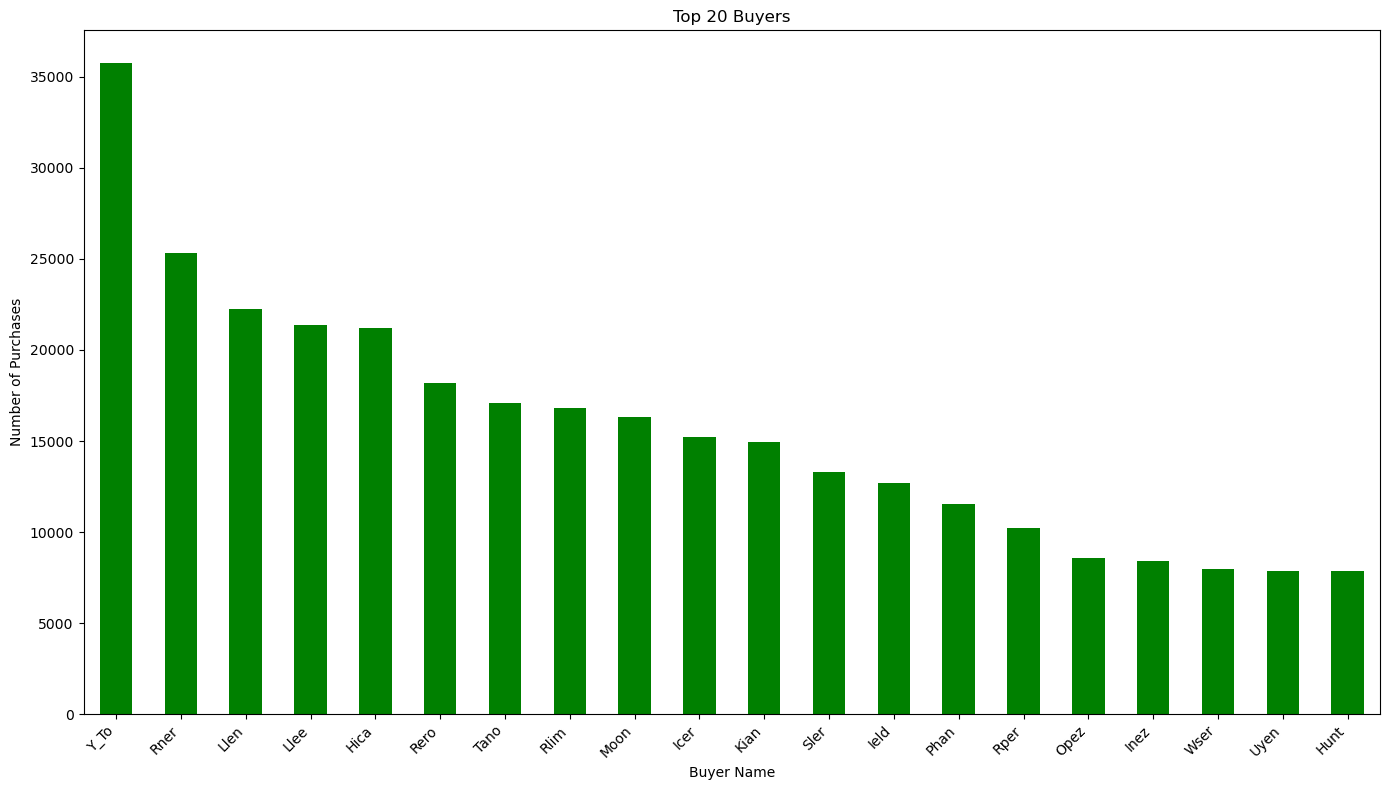

In [98]:
# 8. Top 20 Buyers
top_buyers = df.groupby('Buyer name')['PO ID'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 8))
top_buyers.plot(kind='bar', color='green')
plt.title('Top 20 Buyers')
plt.xlabel('Buyer Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


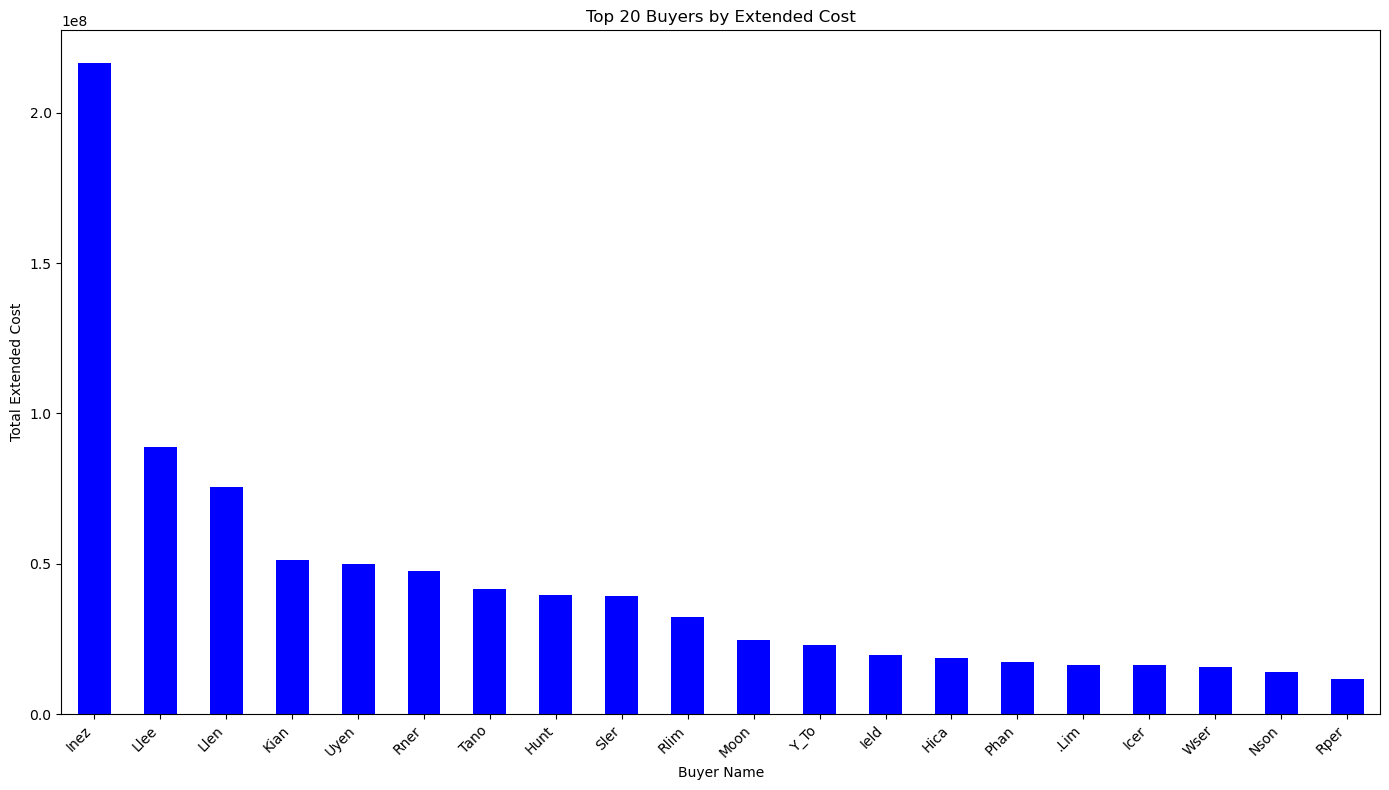

In [56]:
# Extended Cost by Buyer
extended_cost_by_buyer = df.groupby('Buyer name')['Extended cost'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(14, 8))
extended_cost_by_buyer.plot(kind='bar', color='blue')
plt.title('Top 20 Buyers by Extended Cost')
plt.xlabel('Buyer Name')
plt.ylabel('Total Extended Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
file_path = r"C:\Users\nagai\OneDrive\Desktop\cleaneddata\cleaned_data1.csv" 
df = pd.read_csv(file_path, encoding='ISO-8859-1' , low_memory = False)
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351724 entries, 0 to 351723
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PO ID                           351724 non-null  object 
 1   PO line item num                351724 non-null  int64  
 2   PO line Release num             351724 non-null  int64  
 3   Supplier number                 351724 non-null  int64  
 4   Supplier name                   351724 non-null  object 
 5   ship-from address               351724 non-null  object 
 6   PN/line desc                    231010 non-null  object 
 7   Part Description                351724 non-null  object 
 8   line origination date           351724 non-null  object 
 9   Qty                             351724 non-null  float64
 10  Unit of Measure (UOM)           351724 non-null  object 
 11  Currency                        351724 non-null  object 
 12  Un

In [59]:
import pandas as pd

# Ensure date columns are in datetime format
df['Supplier promise date'] = pd.to_datetime(df['Supplier promise date'], errors='coerce')
df['Delivery date/receipt date'] = pd.to_datetime(df['Delivery date/receipt date'], errors='coerce')


In [60]:
# Count missing values in critical columns
missing_promise_dates = df['Supplier promise date'].isna().sum()
missing_delivery_dates = df['Delivery date/receipt date'].isna().sum()

print(f"Missing 'Supplier promise date': {missing_promise_dates}")
print(f"Missing 'Delivery date/receipt date': {missing_delivery_dates}")


Missing 'Supplier promise date': 45
Missing 'Delivery date/receipt date': 0


In [61]:
df['Supplier promise date'] = df['Supplier promise date'].ffill()

In [62]:
df['Lead Time (days)'] = (df['Delivery date/receipt date'] - df['Supplier promise date']).dt.days

In [68]:
# Check distribution
print(df['Lead Time (days)'].describe())

# Set negative lead times (e.g., early deliveries) to 0
df['Lead Time (days)'] = df['Lead Time (days)'].apply(lambda x: x if x >= 0 else 0)

# Cap extremely high values (e.g., long backorders) to a reasonable limit (365 days)
df['Lead Time (days)'] = df['Lead Time (days)'].apply(lambda x: x if x <= 365 else 365)

# Final check
print(df['Lead Time (days)'].describe())


count   351,724.00
mean          0.44
std          79.09
min      -7,179.00
25%           0.00
50%           0.00
75%           0.00
max       2,102.00
Name: Lead Time (days), dtype: float64
count   351,724.00
mean          1.25
std           5.77
min           0.00
25%           0.00
50%           0.00
75%           0.00
max         365.00
Name: Lead Time (days), dtype: float64


In [69]:
# Count extreme negative lead times
neg_lead_times = df[df['Lead Time (days)'] < -30]  # Assuming -30 days is an extreme early delivery
print(f"Negative Lead Times (< -30 days): {len(neg_lead_times)}")

# Count extreme positive lead times
high_lead_times = df[df['Lead Time (days)'] > 365]  # Assuming >1 year (365 days) is excessive
print(f"Excessive Lead Times (> 365 days): {len(high_lead_times)}")


Negative Lead Times (< -30 days): 0
Excessive Lead Times (> 365 days): 0


In [72]:
# Cap lead times to a reasonable range (e.g., 0 to 365 days)
df['Lead Time (days)'] = df['Lead Time (days)'].apply(lambda x: 0 if x < 0 else (365 if x > 365 else x))

# Recalculate summary statistics after cleaning
print(df['Lead Time (days)'].describe())

count   351,724.00
mean          1.25
std           5.77
min           0.00
25%           0.00
50%           0.00
75%           0.00
max         365.00
Name: Lead Time (days), dtype: float64


In [74]:
problematic_suppliers = df.groupby('Supplier name')['Lead Time (days)'].mean().sort_values(ascending=False)

print("Suppliers with the highest average lead time:")
print(problematic_suppliers.head(10))

Suppliers with the highest average lead time:
Supplier name
Cheyney                       68.57
Adareus                       45.00
Pi Shop Inc.                  25.80
Uson                          22.00
American Design  Inc.         15.22
Oliver-Featerville Location   14.17
Rapid Conn (S) Pte Ltd        13.12
Peliton  Plastics Group       13.02
Volpi                         12.20
Abp Electronics Limited       11.00
Name: Lead Time (days), dtype: float64


# HIGHEST LEAD TIME SUPPLIERS

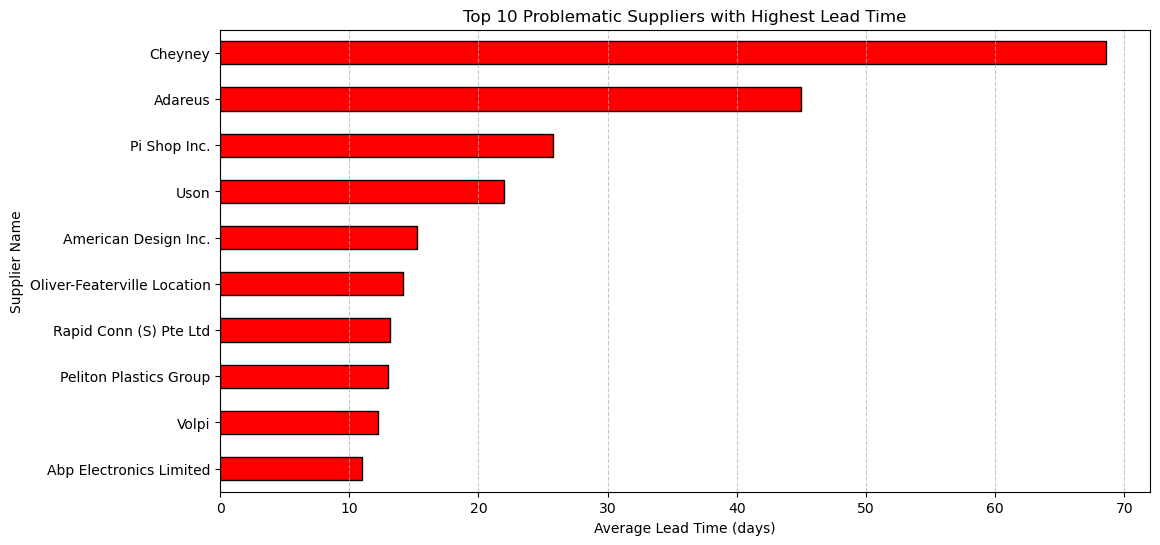

In [77]:
# Re-create the problematic suppliers dataset from provided data
import matplotlib.pyplot as plt
import pandas as pd

# Manually input the supplier data
problematic_suppliers = {
    "Cheyney": 68.57,
    "Adareus": 45.00,
    "Pi Shop Inc.": 25.80,
    "Uson": 22.00,
    "American Design Inc.": 15.22,
    "Oliver-Featerville Location": 14.17,
    "Rapid Conn (S) Pte Ltd": 13.12,
    "Peliton Plastics Group": 13.02,
    "Volpi": 12.20,
    "Abp Electronics Limited": 11.00
}


top_problematic_suppliers = pd.Series(problematic_suppliers).sort_values(ascending=True)


plt.figure(figsize=(12,6))
top_problematic_suppliers.plot(kind='barh', color='red', edgecolor='black')
plt.xlabel('Average Lead Time (days)')
plt.ylabel('Supplier Name')
plt.title('Top 10 Problematic Suppliers with Highest Lead Time')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# FORECASTING

In [80]:
file_path = r"C:\Users\nagai\OneDrive\Desktop\cleaneddata\cleaned_data1.csv" 
df = pd.read_csv(file_path, encoding='ISO-8859-1' , low_memory=False)

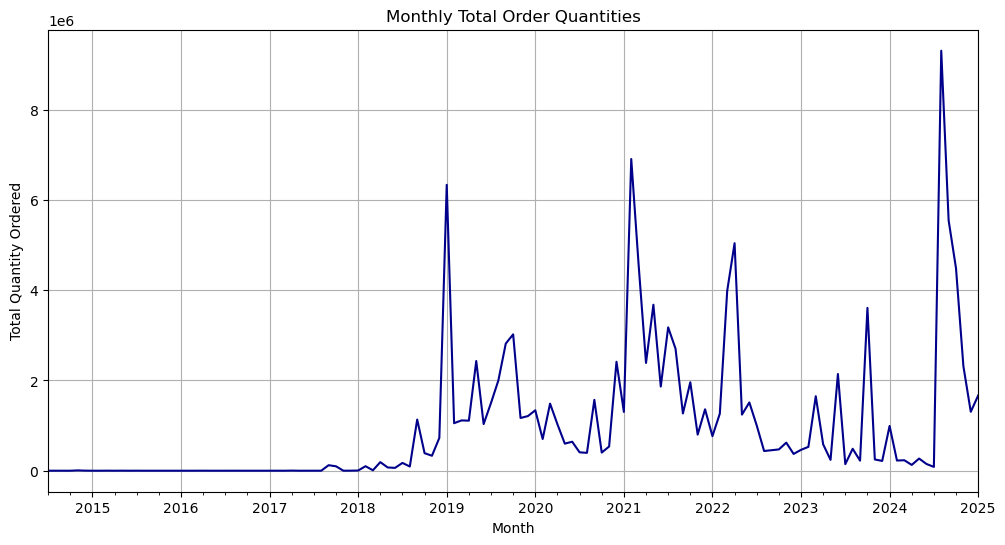

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# 'line origination date' to datetime format
df['line origination date'] = pd.to_datetime(df['line origination date'], errors='coerce')

# Set 'line origination date' as the index
df.set_index('line origination date', inplace=True)

# Resample the data by month and sum the quantities ordered
monthly_order_quantities = df['Qty'].resample('ME').sum()

# Plot total quantities ordered over time (monthly)
plt.figure(figsize=(12, 6))
monthly_order_quantities.plot(title='Monthly Total Order Quantities', color='darkblue')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.grid(True)
plt.show()


In [110]:
from statsmodels.tsa.stattools import adfuller

# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(monthly_order_quantities)

# the test results
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

# If p-value < 0.05, the data is stationary, else we need to differencing it


ADF Statistic: -4.6724553338599835
p-value: 9.477176891833926e-05


### ADF Statistic: -4.6725
### p-value: 0.000095

In [115]:
from statsmodels.tsa.arima.model import ARIMA

                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  127
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1958.205
Date:                Thu, 13 Feb 2025   AIC                           3928.409
Time:                        06:24:26   BIC                           3945.427
Sample:                    07-31-2014   HQIC                          3935.323
                         - 01-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5093      0.095     -5.372      0.000      -0.695      -0.323
ar.L2         -0.3472      0.126     -2.749      0.006      -0.595      -0.100
ar.L3         -0.2833      0.131     -2.156      0.0

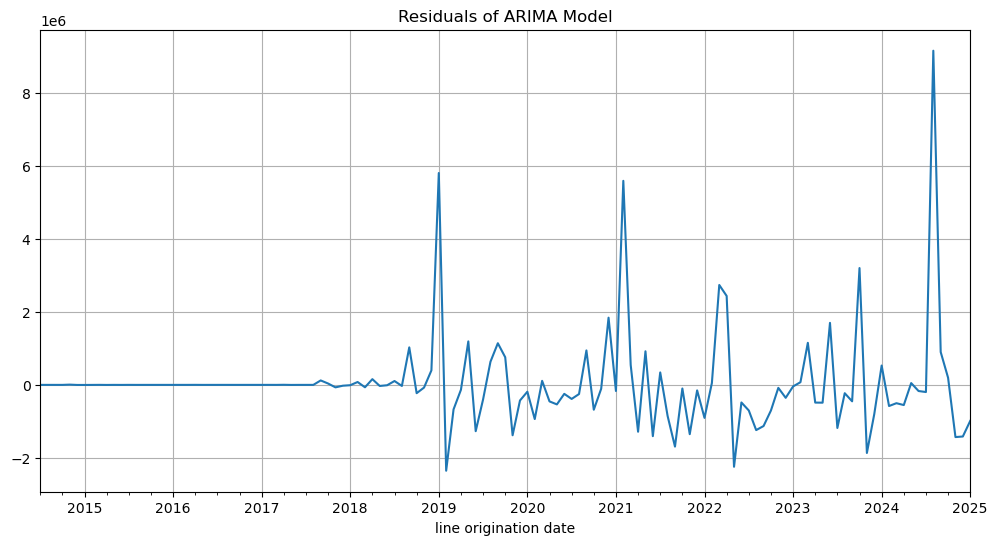

In [117]:
# Fit the ARIMA model (with example parameters, adjust as needed)
model = ARIMA(monthly_order_quantities, order=(5,1,0))  # Example order (p=5, d=1, q=0)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the residuals
plt.figure(figsize=(12, 6))
model_fit.resid.plot()
plt.title('Residuals of ARIMA Model')
plt.grid(True)
plt.show()


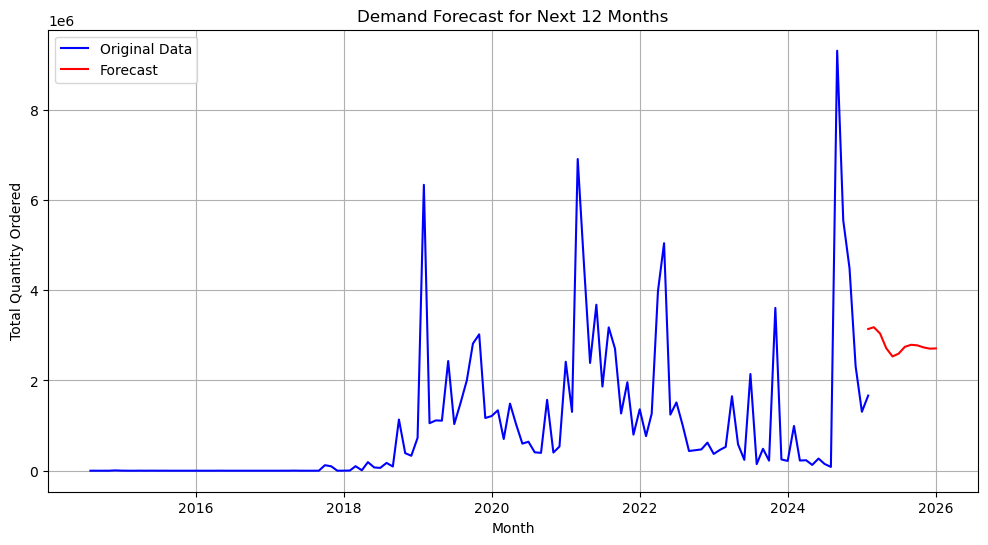

In [119]:
# Forecast future demand (for the next 12 months, adjust as needed)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast alongside the original data
plt.figure(figsize=(12, 6))
plt.plot(monthly_order_quantities, label='Original Data', color='blue')
plt.plot(pd.date_range(monthly_order_quantities.index[-1], periods=forecast_steps, freq='ME'), forecast, label='Forecast', color='red')
plt.title('Demand Forecast for Next 12 Months')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.legend()
plt.grid(True)
plt.show()


# LSTM

In [307]:
file_path = r"C:\Users\nagai\OneDrive\Desktop\cleaneddata\cleaned_data1.csv" 
df = pd.read_csv(file_path, encoding='ISO-8859-1' , low_memory=False)

In [309]:

# 1. Convert date columns to datetime format
df['Request date / Need date'] = pd.to_datetime(df['Request date / Need date'], errors='coerce')
df['Supplier acknowledgment date'] = pd.to_datetime(df['Supplier acknowledgment date'], errors='coerce')
df['Supplier promise date'] = pd.to_datetime(df['Supplier promise date'], errors='coerce')
df['Delivery date/receipt date'] = pd.to_datetime(df['Delivery date/receipt date'], errors='coerce')
df['line origination date'] = pd.to_datetime(df['line origination date'], errors='coerce')

# 2. Handle missing values
# Fill missing values in 'Qty' and 'Extended cost' with median values
df['Qty'].fillna(df['Qty'].median())
df['Extended cost'].fillna(df['Extended cost'].median())

# Fill missing values in non-numeric columns with 'Unknown' or drop them
df['PN/line desc'].fillna('Unknown')
df['Part Description'].fillna('Unknown')

# 3. Handle duplicates
df.drop_duplicates(inplace=True)

# 4. Handle outliers
# Define thresholds for outliers using 1.5 * IQR (Inter-Quartile Range) method
Q1_qty = df['Qty'].quantile(0.25)
Q3_qty = df['Qty'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
lower_qty = Q1_qty - 1.5 * IQR_qty
upper_qty = Q3_qty + 1.5 * IQR_qty

# Remove outliers in 'Qty'
df = df[(df['Qty'] >= lower_qty) & (df['Qty'] <= upper_qty)]

# Define thresholds for 'Extended cost'
Q1_cost = df['Extended cost'].quantile(0.25)
Q3_cost = df['Extended cost'].quantile(0.75)
IQR_cost = Q3_cost - Q1_cost
lower_cost = Q1_cost - 1.5 * IQR_cost
upper_cost = Q3_cost + 1.5 * IQR_cost

# Remove outliers in 'Extended cost'
df = df[(df['Extended cost'] >= lower_cost) & (df['Extended cost'] <= upper_cost)]

# Save cleaned data to a new file
df.to_csv('cleaned_data.csv', index=False)

# Show the cleaned data summary
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 255514 entries, 0 to 351664
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   PO ID                           255514 non-null  object        
 1   PO line item num                255514 non-null  int64         
 2   PO line Release num             255514 non-null  int64         
 3   Supplier number                 255514 non-null  int64         
 4   Supplier name                   255514 non-null  object        
 5   ship-from address               255514 non-null  object        
 6   PN/line desc                    145401 non-null  object        
 7   Part Description                255514 non-null  object        
 8   line origination date           255514 non-null  datetime64[ns]
 9   Qty                             255514 non-null  float64       
 10  Unit of Measure (UOM)           255514 non-null  object      

In [273]:
df.head(10)

,PO ID,PO line item num,PO line Release num,Supplier number,Supplier name,ship-from address,PN/line desc,Part Description,line origination date,Qty,...,Currency,Unit cost,Extended cost,Request date / Need date,Supplier acknowledgment date,Supplier promise date,Delivery date/receipt date,Line item status (open/closed),Buyer name,Ship to address_y
0,*100009,1,1,3003479,Cellares,"341 Allenton Ave South San Francisco, CA 9408...",540-00023-0CS,"ETHERCAT PLUG-IN MOD, 8-CH OUT, ANALOG, 24 VDC...",2024-05-09,8.00,...,USD,0.00,0.00,2024-05-09,2024-05-09,2024-05-09,2024-05-09,Closed,Rner,103
1,*100011,1,1,1000741,Korvis Automation,"2101 NE Jack London Street Corvallis, OR 9733...",455-03526-0,"CLAMP, PICOMAG SENSOR, SIDE MOUNTED",2024-12-09,16.00,...,USD,25.55,408.80,2025-01-06,2025-01-06,2025-01-06,2025-01-09,Cancelled,Jeda,103
2,*100011,1,1,1000741,Korvis Automation,"4100 SW RESEARCH WAY CORVALLIS, OR 97333 UNIT...",455-03526-0,"CLAMP, PICOMAG SENSOR, SIDE MOUNTED",2024-12-09,16.00,...,USD,25.55,408.80,2025-01-06,2025-01-06,2025-01-06,2025-01-09,Cancelled,Jeda,103
3,*100011,1,2,1000741,Korvis Automation,"2101 NE Jack London Street Corvallis, OR 9733...",455-03526-0,"CLAMP, PICOMAG SENSOR, SIDE MOUNTED",2024-12-09,16.00,...,USD,25.55,408.80,2025-02-11,2025-02-11,2025-02-11,2025-02-14,Cancelled,Jeda,103
4,*100011,1,2,1000741,Korvis Automation,"4100 SW RESEARCH WAY CORVALLIS, OR 97333 UNIT...",455-03526-0,"CLAMP, PICOMAG SENSOR, SIDE MOUNTED",2024-12-09,16.00,...,USD,25.55,408.80,2025-02-11,2025-02-11,2025-02-11,2025-02-14,Cancelled,Jeda,103
10,1044127,2,18,1002879,Peliton Plastics Group,"130 N BLANCHARD ST VALDOSTA, GA 31601 UNITED ...",331115-02,RACK_TYPE-2_MACHINED,2014-11-05,23.00,...,USD,13.56,311.93,2020-12-31,2020-12-31,2020-12-31,2020-12-31,Closed,Iams,101
11,1044127,2,18,1002879,Peliton Plastics Group,"136 N BLANCHARD ST VALDOSTA, GA 31601 UNITED ...",331115-02,RACK_TYPE-2_MACHINED,2014-11-05,23.00,...,USD,13.56,311.93,2020-12-31,2020-12-31,2020-12-31,2020-12-31,Closed,Iams,101
19,110001,1,1,1000200,Digi Key,701 Brooks Ave South PO Box 677 Thief River Fa...,Unknown,WM3706-ND CONN RECEPT 14POS DUAL,2020-07-24,15.00,...,USD,0.66,9.90,2020-07-23,2020-07-30,2020-07-30,2020-07-30,Closed,Llen,101
20,110001,1,1,1000200,Digi Key,"PO BOX 250 THIEF RIVER FALLS, MN 56701 UNITED...",Unknown,WM3706-ND CONN RECEPT 14POS DUAL,2020-07-24,15.00,...,USD,0.66,9.90,2020-07-23,2020-07-30,2020-07-30,2020-07-30,Closed,Llen,101
21,110001,10,1,1000200,Digi Key,701 Brooks Ave South PO Box 677 Thief River Fa...,Unknown,23-0039012146-ND CONN PLUG 14POS PANEL MOUNT,2020-07-24,10.00,...,USD,1.04,10.40,2020-07-23,2020-07-30,2020-07-30,2020-07-30,Closed,Llen,101


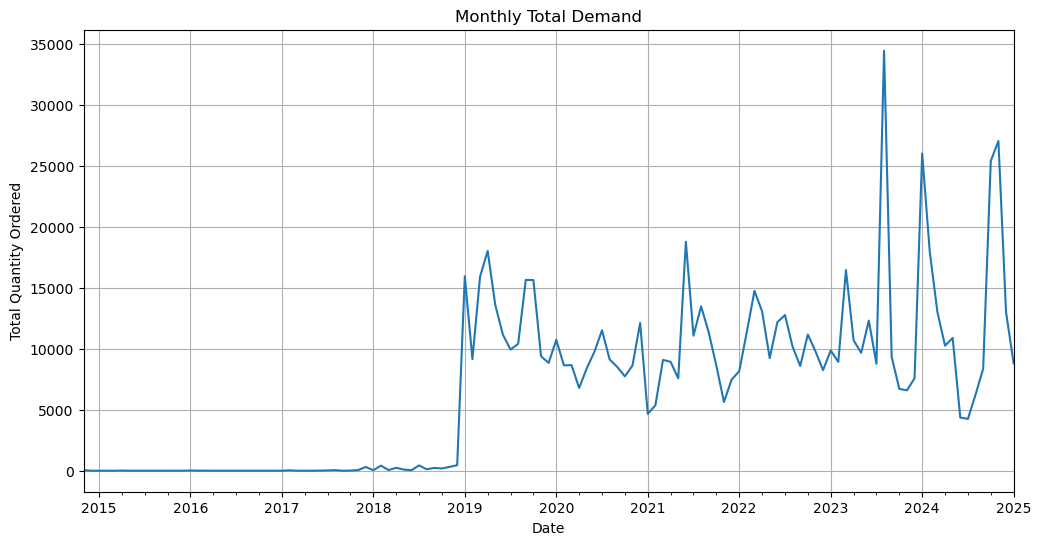

In [275]:
# Convert 'line origination date' to datetime
df['line origination date'] = pd.to_datetime(df['line origination date'], errors='coerce')

# Set the 'line origination date' as the index
df.set_index('line origination date', inplace=True)

# Resample data by month and sum the 'Qty' (quantity) for each month
monthly_data = df['Qty'].resample('ME').sum()

# Plot the total demand per month
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_data.plot()
plt.title('Monthly Total Demand')
plt.xlabel('Date')
plt.ylabel('Total Quantity Ordered')
plt.grid(True)
plt.show()


C:\Users\nagai\AppData\Local\Temp\ipykernel_32980\2671963384.py:10: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')
C:\Users\nagai\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 51s 12ms/step - loss: 0.0371 - val_loss: 0.0303
Epoch 2/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - loss: 0.0345 - val_loss: 0.0301
Epoch 3/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 44s 10ms/step - loss: 0.0340 - val_loss: 0.0298
Epoch 4/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - loss: 0.0335 - val_loss: 0.0297
Epoch 5/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - loss: 0.0336 - val_loss: 0.0299
Epoch 6/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - loss: 0.0333 - val_loss: 0.0295
Epoch 7/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 49s 12ms/step - loss: 0.0332 - val_loss: 0.0299
Epoch 8/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - loss: 0.0332 - val_loss: 0.0295
Epoch 9/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 44s 10ms/step - loss: 0.0331 - val_loss: 0.0295
Epoch 10/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - loss: 0.0333 - val_loss: 0.0293
Epoch 11/20
4188/4188 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - loss: 0.0334 - val_loss: 0.0293
Epoch 12

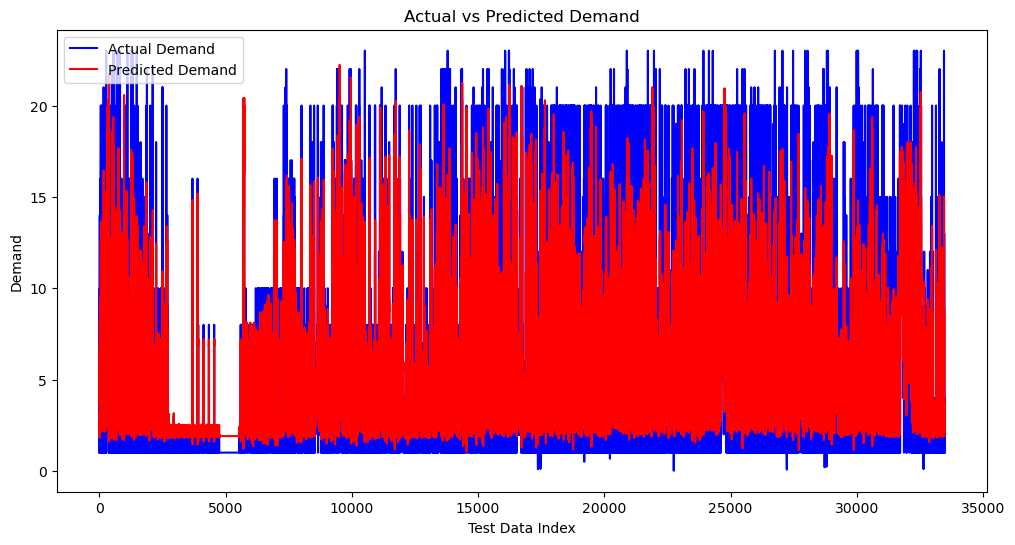

In [279]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv('cleaned_data.csv')

# Prepare the data (assuming 'line origination date' and 'Qty' are relevant columns)
df['line origination date'] = pd.to_datetime(df['line origination date'])
df.set_index('line origination date', inplace=True)

# Selecting only the 'Qty' column for forecasting
data = df['Qty'].values.reshape(-1, 1)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create dataset with time steps (for LSTM)
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Split data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create datasets for training and testing
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data into 3D format for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform y_test to get the real values
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate error metrics
mae = mean_absolute_error(y_test_real, predictions)
rmse = np.sqrt(mean_squared_error(y_test_real, predictions))

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


1047/1047 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


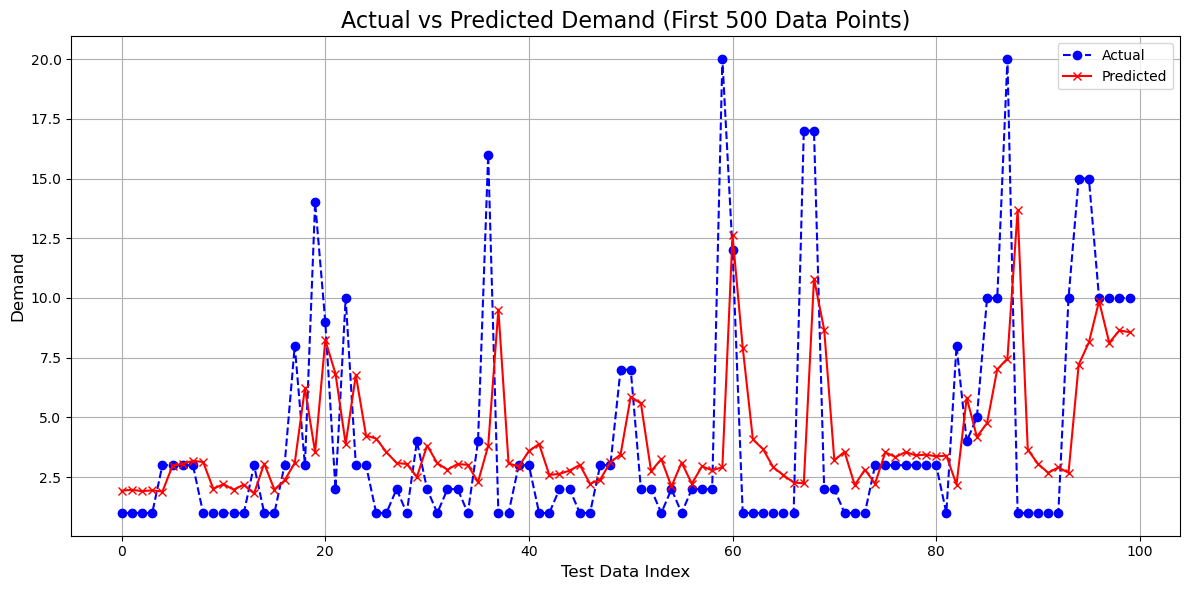

In [291]:
# Generate predictions for the test data
y_pred = model.predict(X_test)

# Inverse scale the predictions and actual values to bring them back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting only the first 500 values for better visibility
plt.figure(figsize=(12, 6))
plt.plot(np.arange(100), y_test_rescaled[:100], label='Actual', color='blue', marker='o', linestyle='--')
plt.plot(np.arange(100), y_pred_rescaled[:100], label='Predicted', color='red', marker='x', linestyle='-')
plt.title('Actual vs Predicted Demand (First 500 Data Points)', fontsize=16)
plt.xlabel('Test Data Index', fontsize=12)
plt.ylabel('Demand', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [297]:
# Display the first few actual and predicted values for comparison
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test_rescaled.flatten(),
    'Predicted': y_pred_rescaled.flatten()
})

# Display the table with the first 10 rows
actual_vs_predicted.head(10)


,Actual,Predicted
0,1.00,1.93
1,1.00,1.97
2,1.00,1.91
3,1.00,1.95
4,3.00,1.89
5,3.00,2.98
6,3.00,3.06
7,3.00,3.19
8,1.00,3.14
9,1.00,2.02


In [301]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, RMSE, and R-squared
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Display the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error (MAE): 2.465161956676871
Mean Squared Error (MSE): 15.452447537105224
Root Mean Squared Error (RMSE): 3.9309601291675835
R-squared: 0.3870813167875925


In [8]:
pip install dash pandas plotly

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.8 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/7.8 MB 12.6 MB/s eta 0:00:01
   --------------------- ------------------ 4.1/7.8 MB 32.8 MB/s eta 0:00:01
   ------------------------------- -------- 6.2/7.8 MB 36.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 38.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Assuming your CSV file is correctly loaded into 'df'
df = pd.read_csv(R'C:\Users\nagai\OneDrive\Desktop\cleaneddata\cleaned_data1.csv')  # Update with your actual CSV file path

# Create a simple plot
fig = px.histogram(df, x='Line item status (open/closed)', title='Status of Line Items')

# Instantiate the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Supply Chain Management Dashboard"),
    dcc.Graph(
        id='example-graph',
        figure=fig
    ),
    html.Label('Select a status to filter:'),
    dcc.Dropdown(
        options=[{'label': i, 'value': i} for i in df['Line item status (open/closed)'].unique()],
        value='Closed',
        id='status-dropdown'
    ),
    html.Div(id='df-display')
])

@app.callback(
    Output('df-display', 'children'),
    Input('status-dropdown', 'value')
)
def update_table(selected_status):
    filtered_df = df[df['Line item status (open/closed)'] == selected_status]
    return html.Table([
        html.Thead(
            html.Tr([html.Th(col) for col in filtered_df.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(filtered_df.iloc[i][col]) for col in filtered_df.columns
            ]) for i in range(min(len(filtered_df), 10))  # Display up to 10 rows
        ])
    ])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\nagai\AppData\Local\Temp\ipykernel_33652\3475686309.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(R'C:\Users\nagai\OneDrive\Desktop\cleaneddata\cleaned_data1.csv')  # Update with your actual CSV file path
